# This script plots the 1-D VSH profile, marks the LAB depth from my LAB calculation and plots the base of crust from CRUST1.0

Reading crust info from:/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/crust1.0/CRUST1.0-vs.r0.1.nc 
Shape of mantle top array:(180, 360)
Shape of lat_cr_arr:(180,)
Shape of lon_cr_arr:(360,)
Verifying
User wants info from CRUST1.0 from long:109.5
User wants info from CRUST1.0 from lat:19.5
The depth to top of the mantle at Lat 19.5, Long 109.5 is -31.729999542236328 km
Shape of vs0 array: (101, 241, 341)
Shape of lon array: (341,)
Shape of lat array: (241,)
Shape of dp array: (101,)
Nearest latitude: 19.999999999999996
Nearest longitude: 110.0
depths:[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600

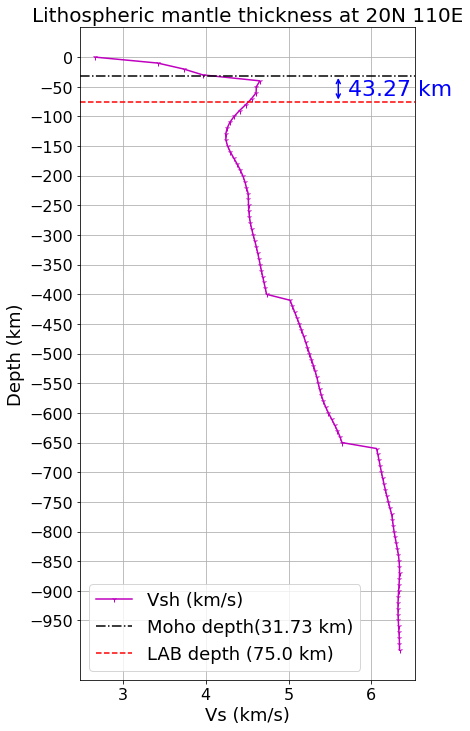

In [2]:
import os
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os

##Finding the depth of Moho from CRUST1.0
dir_cr=f"/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/crust1.0"
crfl=os.path.join(dir_cr,f"CRUST1.0-vs.r0.1.nc")
print(f"Reading crust info from:{crfl} ")

nc_cr= Dataset(crfl,'r')
lat_cr=nc_cr.variables['latitude'][:]
lon_cr=nc_cr.variables['longitude'][:]
mantle_top=nc_cr.variables['mantle_top'][:] #mantle_top is the depth to the top of mantle

# Manually feed the coordinates for which you want the 1-D plot
lat_val =20  # Latitude
lon_val = 110  # Longitude

#array
lat_cr_arr=np.array(lat_cr)
lon_cr_arr=np.array(lon_cr)
#print(f"lat array for CRUST1.0:{lat_cr_arr}")
#print(f"lon array for CRUST1.0:{lon_cr_arr}")
mantle_top_array=np.array(mantle_top)   
#print(f"Mantle top array from CRSUT1.0:{mantle_top_array}")

#shape
print(f"Shape of mantle top array:{mantle_top_array.shape}")
print(f"Shape of lat_cr_arr:{lat_cr_arr.shape}")
print(f"Shape of lon_cr_arr:{lon_cr_arr.shape}")

lat_idx_cr=np.abs(lat_cr_arr-lat_val).argmin()
lon_idx_cr=np.abs(lon_cr_arr-lon_val).argmin()

print(f"Verifying")
print(f"User wants info from CRUST1.0 from long:{lon_cr_arr[lon_idx_cr]}")
print(f"User wants info from CRUST1.0 from lat:{lat_cr_arr[lat_idx_cr]}")
mantle_top_dp=mantle_top_array[lat_idx_cr,lon_idx_cr]
print(f"The depth to top of the mantle at Lat {lat_cr_arr[lat_idx_cr]}, Long {lon_cr_arr[lon_idx_cr]} is {mantle_top_dp} km")


## Open the NetCDF file
ncdir=f"/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/model"
filen =os.path.join(ncdir,f"FWEA23.r0.0-n4.nc")
nc_f = Dataset(filen, 'r')

# Extract variables
vsh = nc_f.variables['vsh']       # Shear wave velocity
lon = nc_f.variables['longitude'][:]  # Longitude
lat = nc_f.variables['latitude'][:]   # Latitude
dp = nc_f.variables['depth'][:]       # Depth

# Convert data to numpy arrays
vsh_array = np.array(vsh)
lon_array = np.array(lon)
lat_array = np.array(lat)
dp_array = np.array(dp)

# Print the shapes of the arrays
print(f"Shape of vs0 array: {vsh_array.shape}")   # Expected shape: (depth, latitude, longitude)
print(f"Shape of lon array: {lon_array.shape}")
print(f"Shape of lat array: {lat_array.shape}")
print(f"Shape of dp array: {dp_array.shape}")

# Find the nearest indices for the given lat and lon values
lat_idx = np.abs(lat_array - lat_val).argmin()
lon_idx = np.abs(lon_array - lon_val).argmin()

# Print the actual lat/lon values corresponding to the nearest indices
print(f"Nearest latitude: {lat_array[lat_idx]}")
print(f"Nearest longitude: {lon_array[lon_idx]}")

# Extract shear wave velocity (Vs0) for the selected lat/lon for all depths
depths = dp_array[:]                 # All depth values
print(f"depths:{depths}")
vsh_values = vsh_array[:, lat_idx, lon_idx]  # 1-D velocity profile for the given lat/lon

##Extracting LAB depth from the file
LABdir=f"/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/LAB/files"
LABf=os.path.join(LABdir,f"Lat_lon_LABDEPTH_moving_average_window_7.txt")
print(f"")
print(f"Reading f{LABf}")

lat_lab_ls=[]
lon_lab_ls=[]
LAB_dp_ls=[]
with open (LABf,'r') as file:
    for line in file:
        col=line.rstrip().split()
        lat_lab=float(col[0])
        lon_lab=float(col[1])
        LAB_dp=float(col[2])
        
        #print(f"{lat_lab}")
        lat_lab_ls.append(lat_lab)
        lon_lab_ls.append(lon_lab)
        LAB_dp_ls.append(LAB_dp)

#arrays
lat_lab_arr=np.array(lat_lab_ls)
lon_lab_arr=np.array(lon_lab_ls)
LAB_dp_arr=np.array(LAB_dp_ls)
print(f"Shape of lat lab array :{lat_lab_arr.shape} Shape of lon lab array:{lon_lab_arr.shape} Shape of Lab dp array:{LAB_dp_arr.shape}")

#lat_lab_idx=np.abs(lat_lab_arr-lat_val).argmin()
#lon_lab_idx=np.abs(lon_lab_arr-lon_val).argmin()

#print(f"Searcing LABdepth for Lat:{lat_lab_arr[lat_lab_idx]}")
#print(f"Searcing LABdepth for Lon:{lon_lab_arr[lon_lab_idx]}")

#print(f"{lat_lab_idx} {lon_lab_idx}")

distances = np.sqrt((lat_lab_arr - lat_val)**2 + (lon_lab_arr - lon_val)**2) # Calculate the distance from the target coordinate to each coordinate in the arrays
closest_idx = distances.argmin() ## Find the index of the minimum distance
closest_lat = lat_lab_arr[closest_idx]
closest_lon = lon_lab_arr[closest_idx]
LAB_depth = LAB_dp_arr[closest_idx]

print(f"Searching LAB depth for Lat: {closest_lat}")
print(f"Searching LAB depth for Lon: {closest_lon}")
print(f"The LAB depth at Lat: {closest_lat}, Lon: {closest_lon} is approximately {LAB_depth} km")

##Sublithospheric mantle thickness
LM_thick=LAB_depth-(-mantle_top_dp) #since from CRUST1.0, its always comes with a negative sign

#Plotting
plt.figure(figsize=(6, 12))
plt.plot(vsh_values, -depths, marker='1', color='m', linestyle='-', label=f"Vsh (km/s)") 
plt.axhline(mantle_top_dp, color='black', linestyle='-.', label=f"Moho depth({-mantle_top_dp:.2f} km)", linewidth=1.5)
plt.axhline(-LAB_depth, color='red', linestyle='--', label=f"LAB depth ({LAB_depth} km)", linewidth=1.5)
mid_depth =  (LAB_depth - (-mantle_top_dp) )
plt.text(6.3, -mid_depth-11, f" {LM_thick:.2f} km",
         ha='center', va='center', color='blue', fontsize=22)

plt.annotate('', xy=(5.6, mantle_top_dp), xycoords='data', 
             xytext=(5.6, -LAB_depth), textcoords='data',
             arrowprops=dict(arrowstyle='<->', color='blue', lw=1.5))

# Adjust font size for tick labels
plt.tick_params(axis='x', labelsize=16)  # X-axis tick label size
plt.tick_params(axis='y', labelsize=16)  # Y-axis tick label size

plt.title(f"Lithospheric mantle thickness at {lat_val}N {lon_val}E", fontsize=20)
plt.xlabel("Vs (km/s)", fontsize=18)
plt.ylabel("Depth (km)", fontsize=18)
plt.grid(True)

# Set depth ticks for better readability
plt.yticks(np.arange(0, -1000, -50))

# Add legend
odir=f"/media/rupak/Rupak_4TB/BACKUPS/MANUSCRIPTS_Rupak/SE_ASIA_MANU_DRAFTS/MERGED/Manu_figs_organised/text_fig/GitHub_upload/LAB/files"
plt.legend(fontsize=18)
plt.savefig(os.path.join(odir,f"Lithospheric_mantle_thickness_{lat_val}N_{lon_val}E.png"))
#plt.savefig(os.path.join(odir,f"Lithospheric_mantle_thickness_{lat_val}N_{lon_val}E.pdf"))
plt.show()
